In [1]:
from experiments.utils.pass_managers import build_pm, run_circuit
from experiments.utils.coupling_maps import file_to_coupling_map
from experiments.utils.circuits      import directory_to_circuits, rename_circuits
from qiskit.transpiler.passes.routing.sabre_swap import SabreSwap
from qiskit.transpiler.passes.layout.sabre_layout import SabreLayout
from qiskit.transpiler.passes import TrivialLayout


Build pass managers

In [2]:
coupling_map = file_to_coupling_map('experiments/coupling_maps/hex_027.txt')
circuits, files  = directory_to_circuits('experiments/circuits/ghz/')
circuits = rename_circuits(circuits, files)

qc = circuits[25]

seed = 42


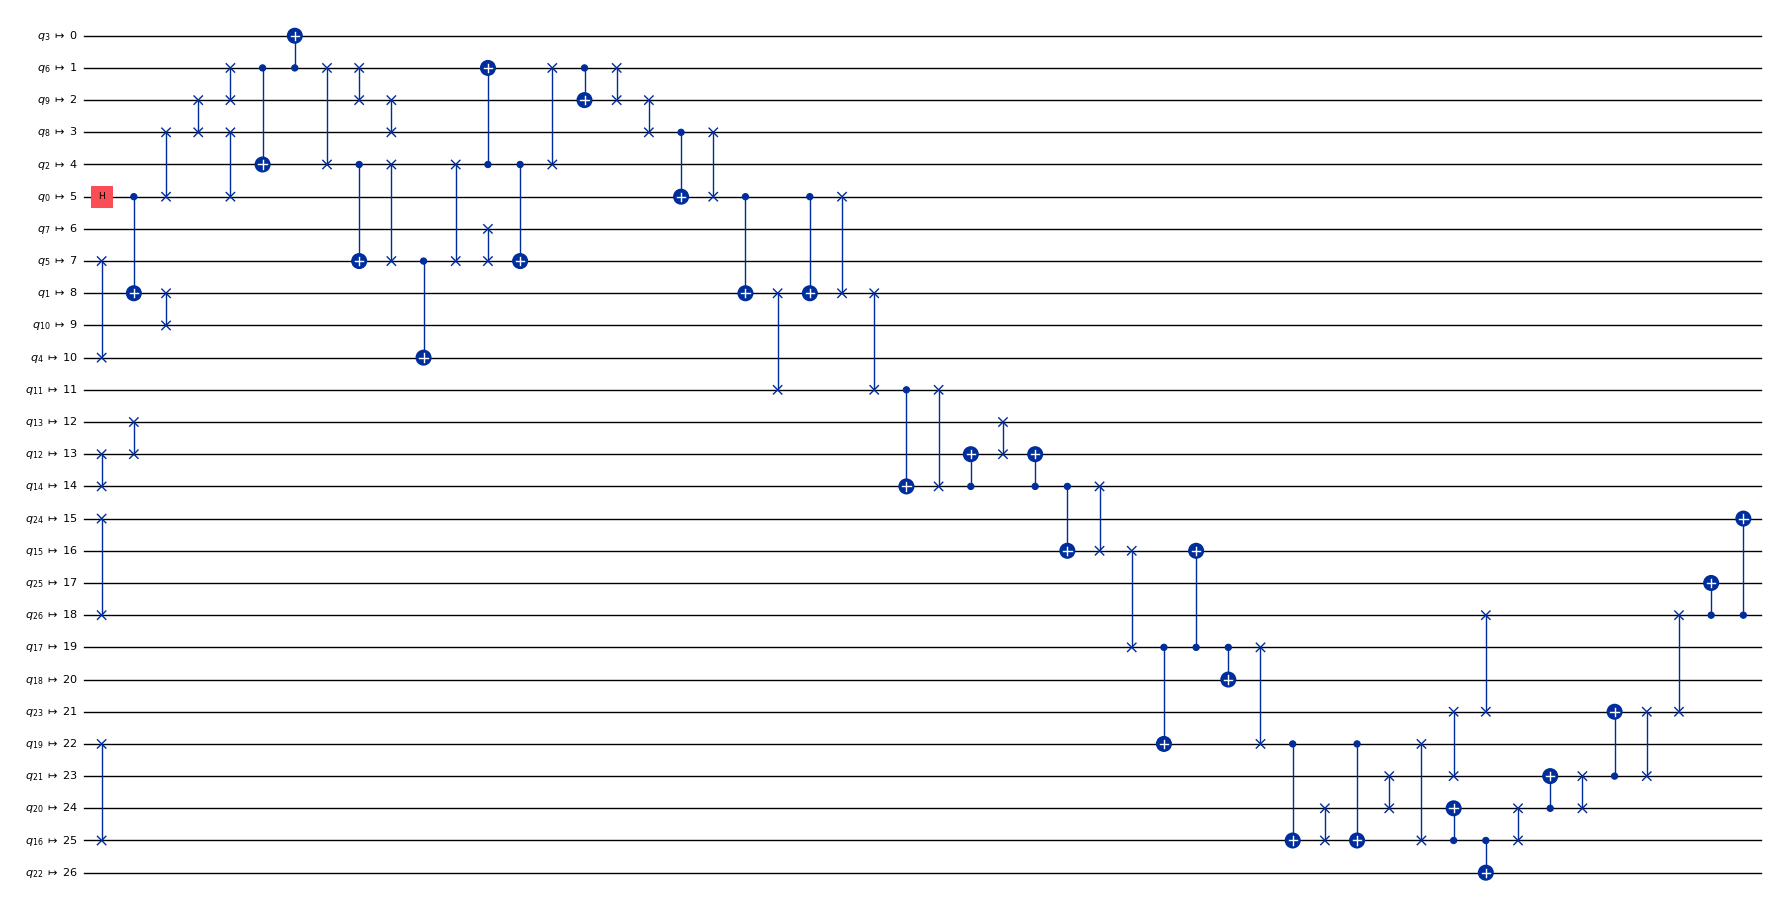

In [3]:
routing_pass = SabreSwap(coupling_map, seed=seed)
layout_pass  = SabreLayout(coupling_map, routing_pass, seed=seed)

pass_manager = build_pm(coupling_map, layout_pass, routing_pass)

qc_tr = pass_manager.run(qc)
qc_tr.draw(output='mpl', idle_wires=False, fold=-1, scale=0.5)

Test `run_circuit`

In [4]:
run_circuit(qc, pass_manager, 4)

    Running the experiment for circuit ghz_27.qasm...
        Depths: 100, 101, 105, 117, 


{'depth': 100,
 'cx': 137,
 'time': 0.016887664794921875,
 'depth_std': 6.7592529172978875,
 'cx_std': 15.056144924913548,
 'time_std': 0.0010556677763636489}

Test with trivial layout

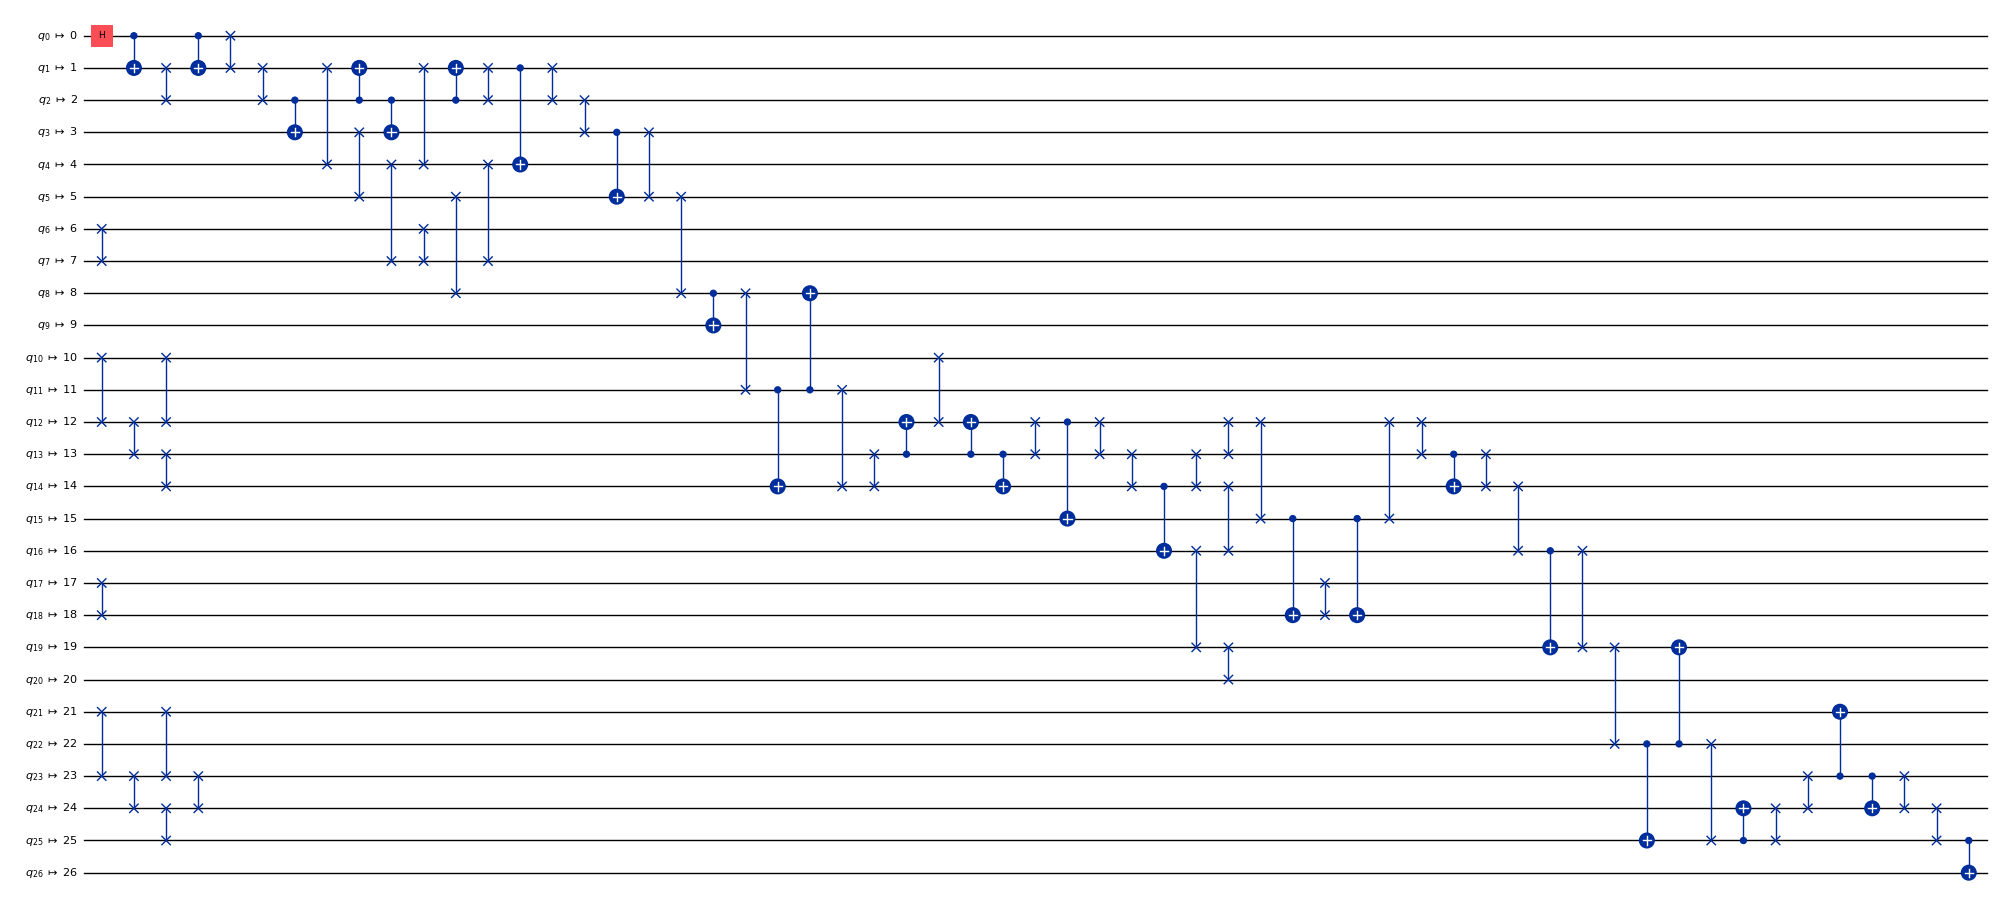

In [5]:
routing_pass = SabreSwap(coupling_map, seed=seed)
layout_pass  = TrivialLayout(coupling_map)
pass_manager = build_pm(coupling_map, layout_pass, routing_pass)

qc_tr = pass_manager.run(qc)
qc_tr.draw(output='mpl', idle_wires=False, fold=-1, scale=0.5)

In [6]:
run_circuit(qc, pass_manager, 4)

    Running the experiment for circuit ghz_27.qasm...
        Depths: 122, 122, 122, 122, 


{'depth': 122,
 'cx': 179,
 'time': 0.0035829544067382812,
 'depth_std': 0.0,
 'cx_std': 0.0,
 'time_std': 0.00036515387417691803}

Testing with no routing pass

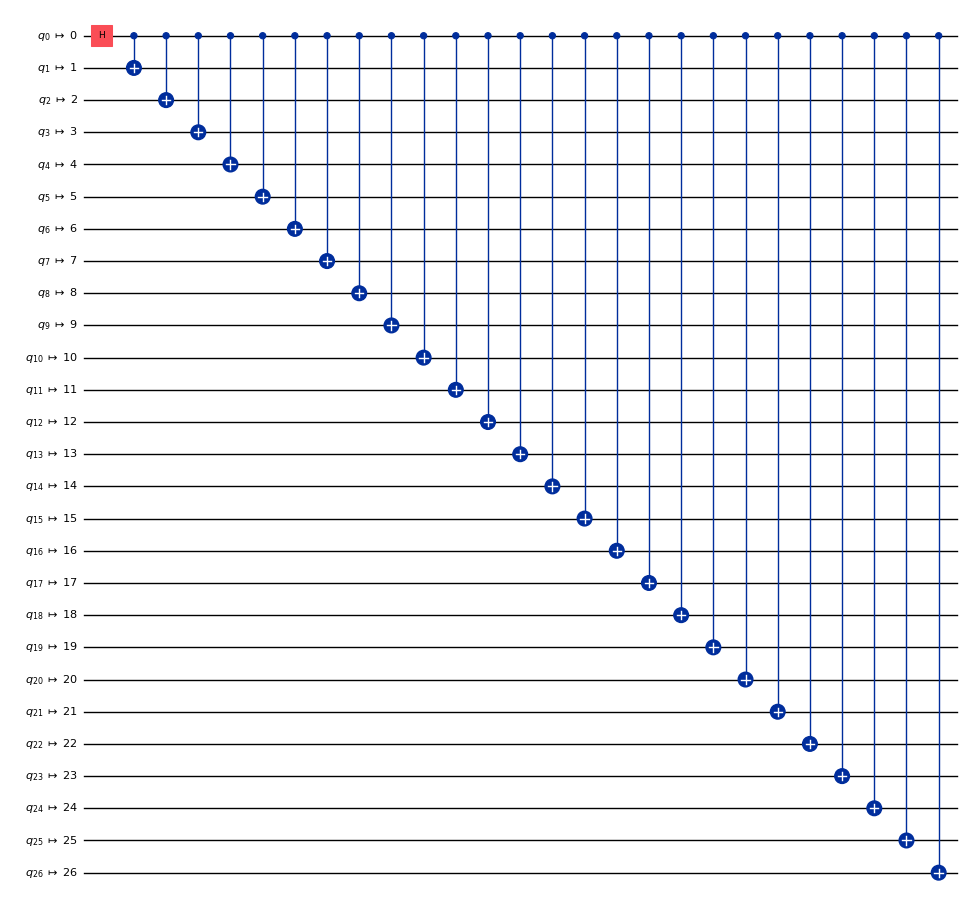

In [7]:
routing_pass = None
layout_pass  = TrivialLayout(coupling_map)
pass_manager = build_pm(coupling_map, layout_pass, routing_pass)

qc_tr = pass_manager.run(qc)
qc_tr.draw(output='mpl', idle_wires=False, fold=-1, scale=0.5)

In [8]:
run_circuit(qc, pass_manager, 4)

    Running the experiment for circuit ghz_27.qasm...
        Depths: 26, 26, 26, 26, 


{'depth': 26,
 'cx': 26,
 'time': 0.0010597705841064453,
 'depth_std': 0.0,
 'cx_std': 0.0,
 'time_std': 0.00014142486649074062}